In [13]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns


In [14]:
data = pd.read_csv('BlackFriday.csv')

# Overview of Sections:
+ Data Description 
+ EDA 
+ Data Modelling 

# EDA

In [15]:
data.head(10)

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
5,1000003,P00193542,M,26-35,15,A,3,0,1,2.0,NaN,15227
6,1000004,P00184942,M,46-50,7,B,2,1,1,8.0,17.0,19215
7,1000004,P00346142,M,46-50,7,B,2,1,1,15.0,NaN,15854
8,1000004,P0097242,M,46-50,7,B,2,1,1,16.0,NaN,15686
9,1000005,P00274942,M,26-35,20,A,1,1,8,NaN,NaN,7871


In [16]:
data.shape

(537577, 12)

In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
User_ID                       537577 non-null int64
Product_ID                    537577 non-null object
Gender                        537577 non-null object
Age                           537577 non-null object
Occupation                    537577 non-null int64
City_Category                 537577 non-null object
Stay_In_Current_City_Years    537577 non-null object
Marital_Status                537577 non-null int64
Product_Category_1            537577 non-null int64
Product_Category_2            370591 non-null float64
Product_Category_3            164278 non-null float64
Purchase                      537577 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+ MB


In [18]:
# I see that there are nulls in the data set 
# I want to see which columns has the null values -- Product Category 2 and 3 
data.isna().any()

User_ID                       False
Product_ID                    False
Gender                        False
Age                           False
Occupation                    False
City_Category                 False
Stay_In_Current_City_Years    False
Marital_Status                False
Product_Category_1            False
Product_Category_2             True
Product_Category_3             True
Purchase                      False
dtype: bool

In [19]:
data.isnull().sum()  # note that there are 537577 rows 

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

It makes sense for there to be missing values because some customers might only buy one category of product and not buy from the other 2 product categories. We should fill the missing value with a 0 to show this. 


Most features are categorical. We will fill in the NAs with 0's for Product Category 2 and 3 

In [20]:
data["Product_Category_2"] = data["Product_Category_2"].fillna(0)
data["Product_Category_3"] = data["Product_Category_3"].fillna(0)

Let's get a quick look at the summary statistics of our data. 

In [101]:
data.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.375770e+05,537577.00000,537577.000000,537577.000000,537577.000000,537577.000000,537577.000000
mean,1.002992e+06,8.08271,0.408797,5.295546,6.784907,3.871773,9333.859853
std,1.714393e+03,6.52412,0.491612,3.750701,6.211618,6.265963,4981.022133
min,1.000001e+06,0.00000,0.000000,1.000000,0.000000,0.000000,185.000000
25%,1.001495e+06,2.00000,0.000000,1.000000,0.000000,0.000000,5866.000000
50%,1.003031e+06,7.00000,0.000000,5.000000,5.000000,0.000000,8062.000000
75%,1.004417e+06,14.00000,1.000000,8.000000,14.000000,8.000000,12073.000000
max,1.006040e+06,20.00000,1.000000,18.000000,18.000000,18.000000,23961.000000


It would make sense to look at the summary statistics of the purchase variable. We see that the average purchase amount is 9333. The remainder of the variables don't make much sense to check summary statistics of since they are categories. Nevertheless, we have included them but won't examine them for insight. 

Text(0,0.5,'Count')

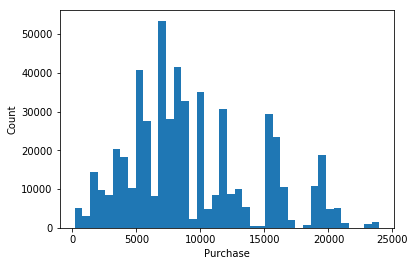

In [102]:
plt.hist(data['Purchase'], bins = 40)
plt.xlabel('Purchase')
plt.ylabel('Count')

If we predict purchase amount, this would be our y variable. It seems like it is right skewed but more or less normal. 

We next want to know the number of unique values in the columns to check if there are recurring customers and to see the variety in products offered. 

In [21]:
for col in data.columns:
    print(col, data[col].nunique())

User_ID 5891
Product_ID 3623
Gender 2
Age 7
Occupation 21
City_Category 3
Stay_In_Current_City_Years 5
Marital_Status 2
Product_Category_1 18
Product_Category_2 18
Product_Category_3 16
Purchase 17959


Some interesting findings: (Note that we have 537577 observations)
- We notice that there are repeating customers since unique user ID is much less than the amount of observations we have
- There are 2 less product varieties in Product Category 3 which can perhaps slightly influence insights. It could be that since there is fewer variety, consumers have less choice which could prompt customers to buy less. 


We can use these features to find interesting patterns in shopping habits

Goals:
- Predict purchase amount based on all features 
- Give recommendations based on age, location  

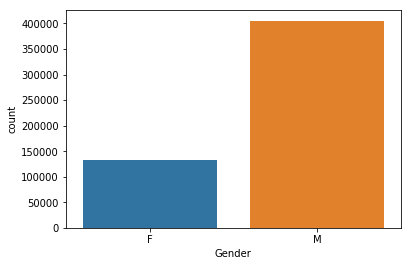

In [23]:
# Let's see ratio of women to men 
sns.countplot(data['Gender'])
plt.show()

We notice there are more male customers than there are female customers, including recurring customers. 

Let's now check to see the female to male ratio against Purchase.

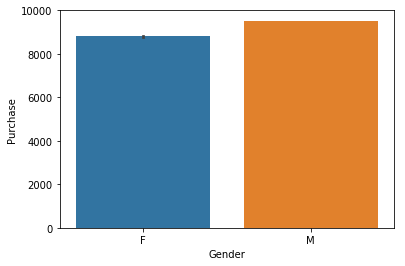

In [33]:
#gender_purchase = data[['Gender', 'Purchase']].groupby(['Gender']).mean()
#gender_purchase.plot.bar()
sns.barplot('Gender', 'Purchase', data = data)
plt.show()

Male customers tend to have purchased more than female customers. There may be different reasons this could be the case. First, we saw that the ratio of males to females is more which would mean more purcahses. It could also be that married couples shop together and it is the husband that tends to purchase the products for his wife. Therefore, the reflection of more male purchasers doesn't necessarily reflect for whom the products are being purchased for. Also, there may be more male customers because the products target males more. It is interesting to see that although there are fewer female customers by count, the purchase amount is much more similar to the male's. This could mean that the products the females purchase are more expensive. 

This leades us to investigate the case further and look into the amount of married couples who make a purchase and compare it to the single shoppers to see if there may be a difference in the habits of the gender of the purchaser. 

In [105]:
gender_marriage = data.groupby(['Gender','Marital_Status']).size().reset_index(name="Total")
gender_marriage.head()

,Gender,Marital_Status,Total
0,F,0,76974
1,F,1,55223
2,M,0,240843
3,M,1,164537


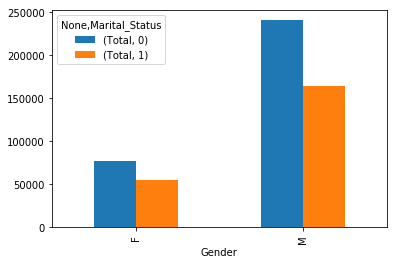

In [108]:
gender_marriage.set_index(['Gender','Marital_Status']).unstack().plot(kind='bar', stacked=False)

We notice that there are more single shoppers than there are married shoppers across gender. This does not support our previous belief that a reason for more male purchasers is attributable to the fact that more couples go shopping togther and the husband purchases the products. We clearly see that single shoppers are more prevalent across both groups. 

Gender has potential to be a decent predictor for purchase. 

Next, we would like to explore the age category. While exploring, we should consider:
- if age has potential to be a good predictor for purchase 
- check differences in gender across age groups 
- check to see if there is much variation in the different age groups for purchases 

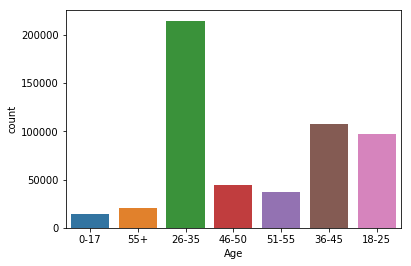

In [121]:
sns.countplot(data['Age'])
plt.show()

From the bar plot above, we see that there are much more shoppers between the ages of 26-35 years than any of the other age groups. We understand from this that the product offerings are catered more towards this age group and one age group above (36-45) and one age group below (18-25) mainly. Since most shoppers are from these age groups, it would make sense for the business to continue stocking their inventory with more of these popular products to cater to these age groups. Knowing this, the business can focus on marketing for these specific age groups and spend the most on them since it is their largest customer composition. Furthermore, it can consider adding more variety in products if it wants to cater to all age groups and potentially increase sales.   

Next, let's check the gender decomposition across the popular age groups to see if males are consistently more across the 3 popular age groups. 

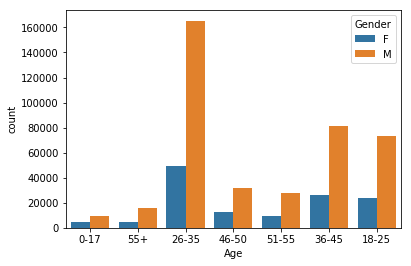

In [25]:
sns.countplot(data['Age'], hue = data['Gender'])
plt.show()

We verify that there are more male shoppers. The difference is especially noticable in the age group of 26-35. Males between ages of 26-35 constitute the largest portion of clients. This can help the business better allocate its energy and money towards targeting males between these age groups and increasing inventory count of these products or increase product offering similar to the ones already selling. Knowing this age group uses social media, the business can also use social media as another way of reaching and attracting customers. 

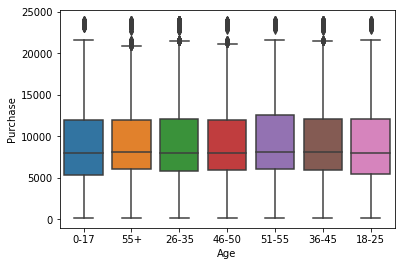

In [122]:
sns.boxplot('Age', 'Purchase', data = data)

It is interesting to see that from the boxplot above there doesn't seem to be much variation in purchase amount across the different age groups. Maybe the less popular clients that fall outside the popular age groups stated earlier purchase more expensive products while the popular clients purchase the less expensive items which would balance and create small variation across age groups.  

Check to see if there is variation in occupation across cities 

In [27]:
city_categs = ['A', 'B', 'C']

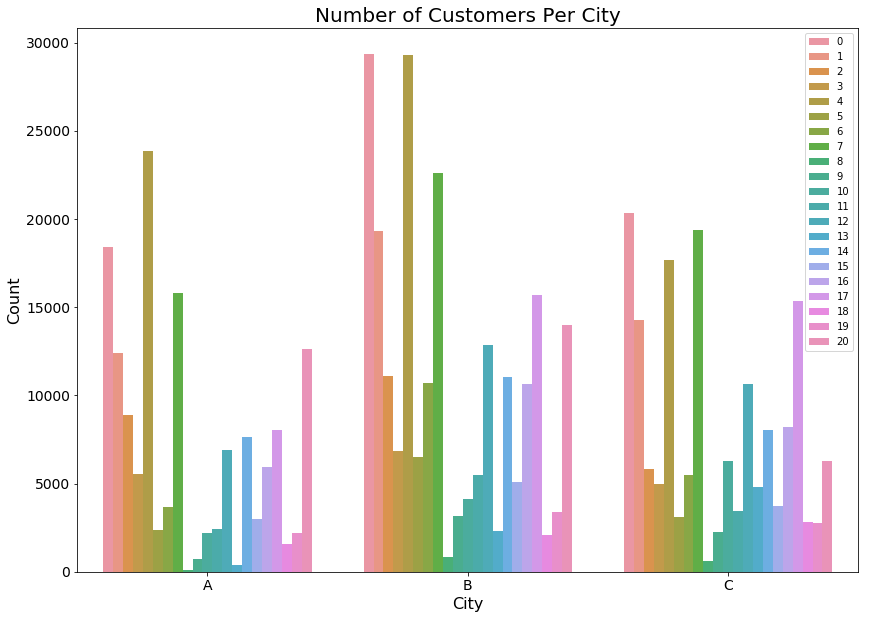

In [120]:
fig1, ax1 = plt.subplots(figsize=(14,10))
sns.countplot(data['City_Category'], order = city_categs, hue = data['Occupation'])
plt.title('Number of Customers Per City', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.legend(loc = 'upper right')
plt.tick_params(labelsize=14)
plt.show()


We see that in each of the cities, there seems to be a similar occupation distribution. Occuption 0, 4, 7 seem to be popular occupations among the customers across the three different cities. There doesn't seem to be much fluctuation across cities. There is more variation in occupation rather than across cities. Therefore, occupation seems to be a better indicator of likelihood of being a customer rather than the city defining it. 

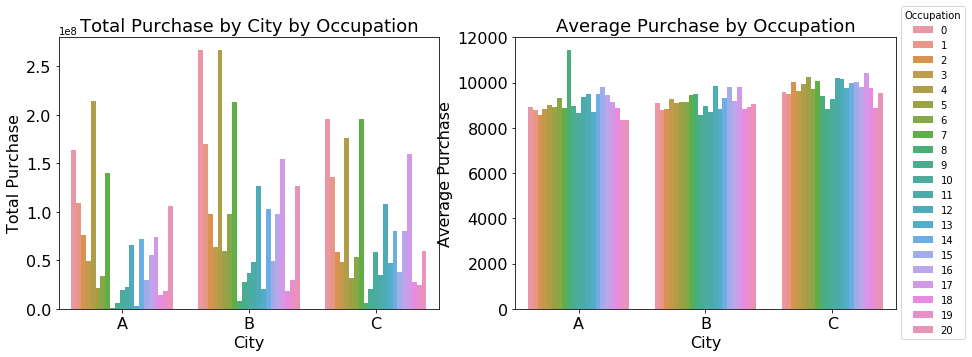

In [93]:
plt.figure(figsize=(15,5))
plt.subplot(121)
tot_purchases_city = data.groupby(['City_Category', 'Occupation']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category', 'Purchase', hue = 'Occupation', data = tot_purchases_city)
plt.title('Total Purchase by City by Occupation',fontsize=18)
plt.xlabel('City',fontsize=16)
plt.ylabel('Total Purchase', fontsize = 16)
plt.tick_params(labelsize=16)
plt.legend().set_visible(False)

plt.subplot(122)
avg_purchases_city = data.groupby(['City_Category', 'Occupation']).agg({'Purchase':np.mean}).reset_index()
sns.barplot('City_Category', 'Purchase', hue = 'Occupation', data = avg_purchases_city)
plt.title('Average Purchase by Occupation',fontsize=18)
plt.xlabel('City',fontsize=16)
plt.ylabel('Average Purchase', fontsize = 16)
plt.legend(title='Occupation',frameon=True,fontsize=10,bbox_to_anchor=(1,0.5), loc="center left")
plt.tick_params(labelsize=16)

From the previous plot, we notice the same distribution and see how total number of customers reflects total purchases so they are positively correlated. From the plot on the right of the average purchase by occupation, we can see how occupation 8 from city A stands out from the rest. It is interesting that the average purchase was higher for Occupation 8 only in City A. This seems to be an outlier in the data. 

Similarly, we next would like to see the variation in age groups across the different cities. 

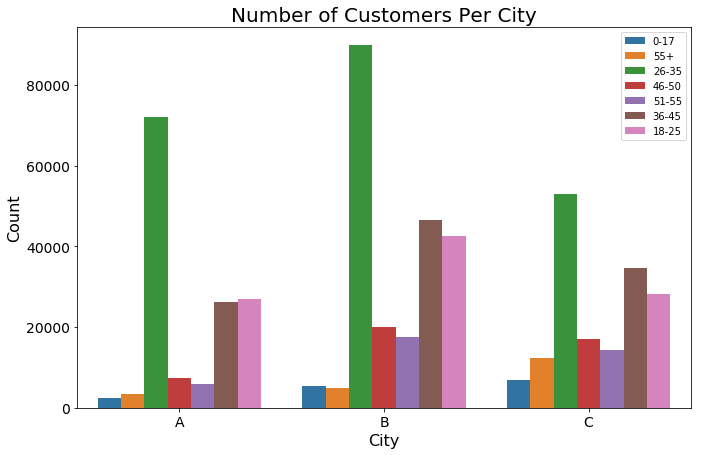

In [128]:
fig1, ax1 = plt.subplots(figsize=(11,7))
sns.countplot(data['City_Category'], order = city_categs, hue = data['Age'])
plt.title('Number of Customers Per City', fontsize = 20)
plt.xlabel('City', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.legend(loc = 'upper right')
plt.tick_params(labelsize=14)
plt.show()

We see a similar distribution of the different age groups across the 3 cities. The most popular age group of 26-35 is mostly from City B. It seems that the most purchases come from City B so the business can target this city more by increasing its advertising to City B. 

We next would like to see how the relation between residency years and total purchase. 

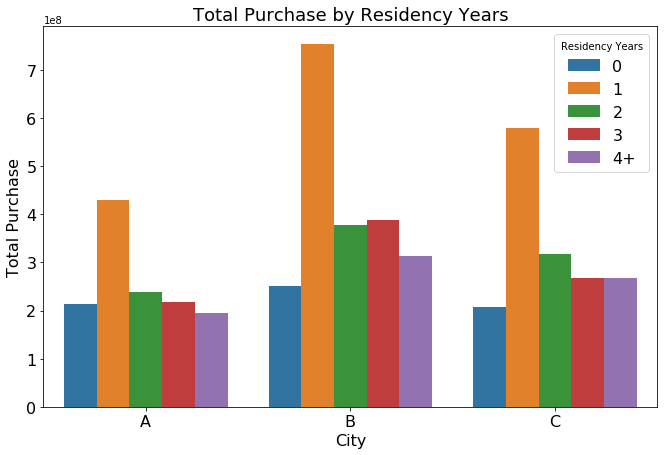

In [134]:
plt.figure(figsize=(11,7))
tot_purchases_yrs = data.groupby(['City_Category', 'Stay_In_Current_City_Years']).agg({'Purchase':np.sum}).reset_index()
sns.barplot('City_Category', 'Purchase', hue = 'Stay_In_Current_City_Years', data = tot_purchases_yrs)
plt.title('Total Purchase by Residency Years',fontsize=18)
plt.xlabel('City',fontsize=16)
plt.ylabel('Total Purchase', fontsize = 16)
plt.tick_params(labelsize=16)
plt.legend(title = 'Residency Years', fontsize = 16)

We once again see a similar residency duration distribution across the 3 cities. It seems to be that customers who have been a resident for 1 year have contributed to total purchases. This is apparent across all 3 cities in orange. New residents are probably not as acquainted with the city and business and have the lowest contribution to total purchases. 

We now want to analyze purchases of products in category 1. 

In [35]:
df = pd.DataFrame(data.groupby('User_ID')['Product_ID'].nunique())
df.head()

,Product_ID
User_ID,
1000001,34
1000002,76
1000003,29
1000004,13
1000005,106


In [36]:
cols = ['User_ID', 'Product_ID', 'Product_Category_1', 'Purchase']
a = data[cols]
a.head()

,User_ID,Product_ID,Product_Category_1,Purchase
0,1000001,P00069042,3,8370
1,1000001,P00248942,1,15200
2,1000001,P00087842,12,1422
3,1000001,P00085442,12,1057
4,1000002,P00285442,8,7969


In [37]:
userid_count = pd.DataFrame(a.groupby('User_ID')['Product_ID', 'Product_Category_1'].nunique())
userid_count.head(10)

userid_count = userid_count.sort_values('Product_ID', ascending = False)
userid_count.head(10)

p_amt_per_user = pd.DataFrame(a.groupby('User_ID')['Purchase'].sum())
p_amt_per_user = p_amt_per_user.sort_values('Purchase', ascending = False)
p_amt_per_user.head(10)

newdf = pd.merge(p_amt_per_user, userid_count, left_index = True, right_index = True)
newdf.head(10)
                

,Purchase,Product_ID,Product_Category_1
User_ID,,,
1004277,10536783,978,18
1001680,8699232,1025,17
1002909,7577505,717,18
1001941,6817493,898,16
1000424,6573609,694,17
1004448,6565878,574,15
1001015,6511302,739,18
1003391,6476786,697,16
1001181,6387899,861,18


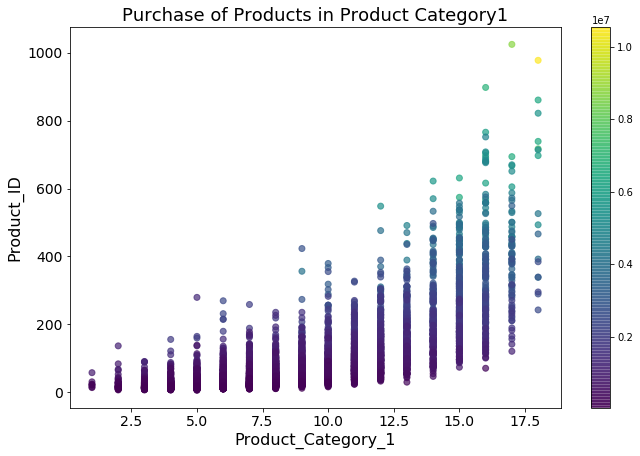

In [141]:
fig, ax = plt.subplots(1, figsize = (11,7)) 
p = plt.scatter('Product_Category_1', 'Product_ID', data = newdf, c = 'Purchase',alpha = 0.7)
plt.xlabel('Product_Category_1', fontsize = 16)
plt.ylabel('Product_ID', fontsize = 16)
plt.title('Purchase of Products in Product Category1', fontsize = 18)
plt.tick_params(labelsize=14)
fig.colorbar(p)

Product ID 1000 from from Product Category 1  seems to be the highest purchase amount. 

Lastly, we run a correlation plot to see the relationships among our variables. 

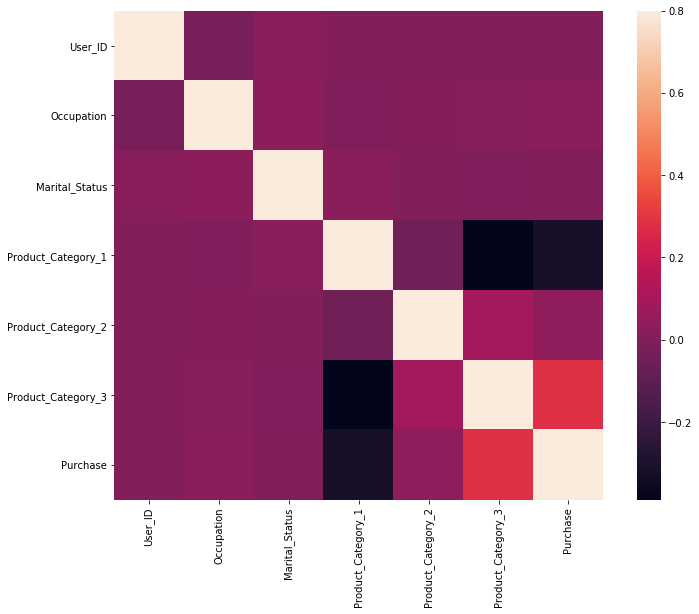

In [61]:
corrmat = data.corr()
fig,ax = plt.subplots(figsize = (12,9))
sns.heatmap(corrmat, vmax=.8, square=True)

Variables correlated with Purchase:
- Product_Category_3 (positive correlation) 
- Product_Category_1 (negative correlation)

Perhaps product_category 3 is positively correlated because it offered cheaper products. 
So let's see if this is true by checking the average price of the product categories.


In [94]:
mean1 = data['Product_Category_1'].mean()
mean2 = data['Product_Category_2'].mean()
mean3 = data['Product_Category_3'].mean()
print(f" Avg1: {mean1} \n Avg2: {mean2} \n Avg3: {mean3}")

 Avg1: 5.295546498455105 
 Avg2: 6.784907092379324 
 Avg3: 3.871772787898292


The average price in product 3 is cheaper than the others categories as hypothesized. This would help explain the behavior of customers to buy more of these products from this category since it is more affordable. 